# NBA Dataset EDA
データセットhttps://www.kaggle.com/drgilermo/nba-players-stats  
統計量の確認、トレンドの可視化等。  
記載ミス他、同姓同名が区別できていない、欠損値、defunctなチーム名が混ざっているのでこのスクリプトで修正する。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
inputDir = "/home/onimem/work/Open_world/NBA/original"
outputDir = "/home/onimem/work/Open_world/NBA/EDA"

from subprocess import check_output
print(check_output(["ls", inputDir]).decode("utf8"))

Players.csv
Seasons_Stats.csv
player_data.csv



In [2]:
# Players.csv
players=pd.read_csv(inputDir + '/Players.csv')
players.drop('Unnamed: 0', axis=1, inplace=True)
players.dropna(how='all',inplace=True)
print(players.shape)
players.head()

(3921, 7)


,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [3]:
# Seasons_Stats.csv
seasons=pd.read_csv(inputDir + '/Seasons_Stats.csv')
seasons.drop('Unnamed: 0', axis=1, inplace=True)
seasons.dropna(how='all',inplace=True)
print(seasons.shape)
seasons.head()

(24624, 52)


,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [4]:
seasons.isnull().sum()

Year          0
Player        0
Pos           0
Age           8
Tm            0
G             0
GS         6391
MP          486
PER         523
TS%          86
3PAr       5785
FTr          99
ORB%       3832
DRB%       3832
TRB%       3053
AST%       2069
STL%       3832
BLK%       3832
TOV%       5042
USG%       4984
blanl     24624
OWS          39
DWS          39
WS           39
WS/48       523
blank2    24624
OBPM       3827
DBPM       3827
BPM        3827
VORP       3827
FG            0
FGA           0
FG%          99
3P         5697
3PA        5697
3P%        9208
2P            0
2PA           0
2P%         128
eFG%         99
FT            0
FTA           0
FT%         858
ORB        3827
DRB        3827
TRB         312
AST           0
STL        3827
BLK        3827
TOV        4979
PF            0
PTS           0
dtype: int64

In [5]:
# player_data.csv
player_data=pd.read_csv(inputDir + '/player_data.csv')
player_data.dropna(how='all',inplace=True)
print(player_data.shape)
player_data.head()

(4550, 8)


,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [6]:
# 同姓同名を区別
num_per_samename = list(player_data.groupby('name').count().sort_values(by='height',ascending=False)['year_start']) # nameあたりの人数
num_per_samename = [num for num in num_per_samename if num > 1] # nameあたりの人数(同姓同名のみ)
samename_unique = len(num_per_samename) # 同姓同名の種類数
name_samename = list(player_data.groupby('name').count().sort_values(by='height',ascending=False)['year_start'][:samename_unique].index) # 同姓同名の種類
samename_dic = {}
for i in range(samename_unique):
    samename_dic[name_samename[i]] = num_per_samename[i]
samename_dic

new_player_data = player_data.copy()

for name, num in samename_dic.items():
    query_str = 'name == "' + name + '"'
    subset = new_player_data.query(query_str)
    #new_seasons.loc[subset.index, 'Player'] = b
    #print(subset.index)
    new_name = []
    for i in range(num):
        new_name.append(name+ ' ' +str(i))
    #print(new_name)
    new_player_data.loc[subset.index, 'name'] = new_name

new_player_data.to_csv(outputDir + '/player_data.csv')

In [7]:
# 上で修正したplayer_data.csvのplayer nameに合わせて、Players.csvとSeasons_Stats.csvのplayer nameも変更

# aaa : Players.csvのname
# bbb : player_data.csvのname
# ccc : Players.csvにあってplayer_data.csvにはない、*印が付いているもの以外のname(名前が略されてるものか、ほんとにないもの)
# ddd : Players.csvで省略されてた選手名とフルネームの辞書
# fff : Players.csvで省略されてた選手の略称
# eee : Players.csvで*印が付いてた選手の*付きname

new_players = players.copy()
new_seasons = seasons.copy()

print(new_players.shape)
print(new_seasons.shape)

aaa = []
for player in players['Player']:
    aaa.append(player)
#print(len(aaa))

bbb = []
for name in new_player_data['name']:
    bbb.append(name)
#print(len(bbb))

ccc = []
for a in aaa:
    if a not in bbb:
        if '*' not in a:
            ccc.append(a)
#print(len(ccc))
#print(new_players.shape)

ddd = {}

for c in ccc:
    ddd[c] = []

for c in ccc:
    for b in bbb:
        if (c in b) and (b.replace(c, '')[0] == ' '):
            
            # Season_Stats.csvの書き換え
            year_start = list(new_player_data.query('name == "' + b + '"')['year_start'])[0]
            year_end = list(new_player_data.query('name == "' + b + '"')['year_end'])[0]
            born = float(list(new_player_data.query('name == "' + b + '"')['birth_date'])[0].split(', ')[1])
            #month = list(new_player_data.query('name == "' + b + '"')['birth_date'])[0].split(', ')[0]
            #print(year_start, year_end)
            for season_year in range(year_start, year_end+1):
                #if ('January' in month) or ('February' in month) or ('March' in month):
                    #age = season_year - born
                #else:
                    #age = season_year - born - 1
                age = season_year - born - 1
                query_str = 'Player == "' + c + '" and Year == ' + str(season_year) + ' and Age ==' + str(age)
                subset = new_seasons.query(query_str)
                if len(subset) == 0:
                    age = season_year - born
                    query_str = 'Player == "' + c + '" and Year == ' + str(season_year) + ' and Age ==' + str(age)
                    subset = new_seasons.query(query_str)
                new_seasons.loc[subset.index, 'Player'] = b
            
            # Players.csvの書き換え
            new_players = new_players.drop(new_players[new_players.Player == c].index)
            ddd[c].append(b)
            new_Player = b
            new_height = list(players.query('Player == "' + c + '"')['height'])[0] #copyのため後で修正
            new_weight = list(players.query('Player == "' + c + '"')['weight'])[0] #copyのため後で修正
            new_collage = list(new_player_data.query('name == "' + b + '"')['college'])[0]
            #print(b)
            new_born = float(list(new_player_data.query('name == "' + b + '"')['birth_date'])[0].split(', ')[1])
            new_birthcity = list(players.query('Player == "' + c + '"')['birth_city'])[0] #copyのため後で修正
            new_birthstate = list(players.query('Player == "' + c + '"')['birth_state'])[0] #copyのため後で修正
            tmp = pd.DataFrame([[new_Player, new_height, new_weight, new_collage, new_born, new_birthcity, new_birthstate]], columns=['Player','height','weight','collage','born','birth_city','birth_state'])
            new_players = new_players.append(tmp, ignore_index=True)

#print(ddd)
#print(new_players.shape)

eee = []
for a in aaa:
    if '*' in a:
        eee.append(a)
        new_players.replace(a, a.replace('*', ''), inplace=True)
        new_seasons.replace(a, a.replace('*', ''), inplace=True)
#print(len(eee))

# Players.csvに誤った記述が多いためplayer_data.csvの情報で上書き
for a in aaa:
    for b in bbb:
        if a == b:
            # nan判定
            hoge = list(new_player_data.query('name == "' + b + '"')['birth_date'])[0]
            if not (hoge == hoge):
                continue
            new_players = new_players.drop(new_players[new_players.Player == a].index)
            new_Player = b
            new_height = list(players.query('Player == "' + a + '"')['height'])[0]
            new_weight = list(players.query('Player == "' + a + '"')['weight'])[0]
            new_collage = list(new_player_data.query('name == "' + b + '"')['college'])[0]
            new_born = float(list(new_player_data.query('name == "' + b + '"')['birth_date'])[0].split(', ')[1])
            new_birthcity = list(players.query('Player == "' + a + '"')['birth_city'])[0]
            new_birthstate = list(players.query('Player == "' + a + '"')['birth_state'])[0]
            tmp = pd.DataFrame([[new_Player, new_height, new_weight, new_collage, new_born, new_birthcity, new_birthstate]], columns=['Player','height','weight','collage','born','birth_city','birth_state'])
            new_players = new_players.append(tmp, ignore_index=True)

new_players.to_csv(outputDir + '/Players.csv')
new_seasons.to_csv(outputDir + '/Seasons_Stats.csv')
print(new_players.shape)
print(new_seasons.shape)

(3921, 7)
(24624, 52)
(3973, 7)
(24624, 52)


シーズンに選手情報を統合。以降、ひとつのデータフレームとして扱う。

In [8]:
data = pd.merge(new_seasons, new_players)
print(data.shape)
data.head()

(24624, 58)


,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,BLK,TOV,PF,PTS,height,weight,collage,born,birth_city,birth_state
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,NaN,NaN,217.0,458.0,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,...,NaN,NaN,97.0,202.0,180.0,77.0,Indiana University,1918.0,NaN,NaN
2,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,NaN,NaN,99.0,279.0,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
3,1951.0,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,0.322,...,NaN,NaN,98.0,152.0,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
4,1952.0,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,0.343,...,NaN,NaN,56.0,126.0,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana


In [9]:
#print(data.isnull().sum())
data.dropna(axis=1, inplace=True)
print(data.shape)
data.head()

(24624, 17)


,Year,Player,Pos,Tm,G,FG,FGA,2P,2PA,FT,FTA,AST,PF,PTS,height,weight,born
0,1950.0,Curly Armstrong,G-F,FTW,63.0,144.0,516.0,144.0,516.0,170.0,241.0,176.0,217.0,458.0,180.0,77.0,1918.0
1,1951.0,Curly Armstrong,G-F,FTW,38.0,72.0,232.0,72.0,232.0,58.0,90.0,77.0,97.0,202.0,180.0,77.0,1918.0
2,1950.0,Cliff Barker,SG,INO,49.0,102.0,274.0,102.0,274.0,75.0,106.0,109.0,99.0,279.0,188.0,83.0,1921.0
3,1951.0,Cliff Barker,SG,INO,56.0,51.0,202.0,51.0,202.0,50.0,77.0,115.0,98.0,152.0,188.0,83.0,1921.0
4,1952.0,Cliff Barker,SG,INO,44.0,48.0,161.0,48.0,161.0,30.0,51.0,70.0,56.0,126.0,188.0,83.0,1921.0


In [10]:
data['Age'] = data['Year'] - data['born'] - 1
data.drop(columns = 'born', inplace=True)
print(data.shape)
data.head()

(24624, 17)


,Year,Player,Pos,Tm,G,FG,FGA,2P,2PA,FT,FTA,AST,PF,PTS,height,weight,Age
0,1950.0,Curly Armstrong,G-F,FTW,63.0,144.0,516.0,144.0,516.0,170.0,241.0,176.0,217.0,458.0,180.0,77.0,31.0
1,1951.0,Curly Armstrong,G-F,FTW,38.0,72.0,232.0,72.0,232.0,58.0,90.0,77.0,97.0,202.0,180.0,77.0,32.0
2,1950.0,Cliff Barker,SG,INO,49.0,102.0,274.0,102.0,274.0,75.0,106.0,109.0,99.0,279.0,188.0,83.0,28.0
3,1951.0,Cliff Barker,SG,INO,56.0,51.0,202.0,51.0,202.0,50.0,77.0,115.0,98.0,152.0,188.0,83.0,29.0
4,1952.0,Cliff Barker,SG,INO,44.0,48.0,161.0,48.0,161.0,30.0,51.0,70.0,56.0,126.0,188.0,83.0,30.0


In [11]:
# チーム名書き換え

allteam = []
for team in data['Tm'].unique():
    allteam.append(team)

#import  re
#text = "ATL…アトランタ・ホークス。BRK…ブルックリン・ネッツ。前の本拠地はニュージャージー。BOS…ボストン・セルティックス。CHA…シャーロット・ホーネッツ。CHI…シカゴ・ブルス。CLE…クリーブランド・キャバリアーズ。キャブスとも。DAL…ダラス・マーベリックス。マブスとも。DEN…デンバー・ナゲッツ。DET…デトロイト・ピストンズ。GSW…ゴールデンステート・ウォリアーズ。本拠地オラクルアリーナで滅法強い。HOU…ヒューストン・ロケッツ。本拠地アリーナはトヨタ・センター。IND…インディアナ・ペイサーズ。LAC…ロサンゼルス・クリッパーズLAL…ロサンゼルス・レイカーズ。MEM…メンフィス・グリズリーズ。前の本拠地はバンクーバー。MIA…マイアミ・ヒート。MIL…ミルウォーキー・バックス。MIN…ミネソタ・ティンバーウルブズ。NOP…ニューオーリンズ・ペリカンズ 。NYK…ニューヨーク・ニックス。本拠地アリーナは世界的に有名なマディソンスクエアガーデン。OKC…オクラホマシティ・サンダー。前の本拠地はシアトル（・スーパーソニックス）。ORL…オランド・マジック。PHO…フェニックス・サンズ。PHI…フィラデルフィア・76ers。POR…ポートランド・トレイルブレイザーズ。SAC…サクラメント・キングス。SAS…サンアントニオ・スパーズ。TOR…トロント・ラプターズ。UTA…ユタ・ジャズWAS…ワシントン・ウィザーズ。前のチーム名はブレッツ。"

#upperReg = re.compile(r'^[A-Z]+$')
#def isupper(s):
#    return upperReg.match(s) is not None

#text2 = ""
#for s in text:
#    if isupper(s):
#        text2 += s
#    else:
#        text2 += ' '
#activeteam = text2.split()

activeteam = ['ATL', 'BRK', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHO', 'PHI', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']

oldteam = []
for i in allteam:
    if i not in activeteam:
        oldteam.append(i)

mergeteam = ['TRI', 'MLH' ,'STL', 'NYN', 'NJN', 'CHO', 'CHH', 'FTW', 'PHW', 'SFW', 'SDR', 'BUF', 'SDC', 'MNL', 'VAN', 'NOH', 'NOK', 'SEA', 'SYR', 'ROC', 'CIN', 'KCO', 'KCK', 'NOJ', 'CHP', 'CHZ', 'BAL', 'CAP', 'WSB']
defunctteam = list(set(oldteam) - set(mergeteam))

print(len(allteam), len(activeteam), len(mergeteam), len(defunctteam))

merge_dic = {}
merge_dic['ATL'] = ['TRI', 'MLH', 'STL']
merge_dic['BRK'] = ['NYN', 'NJN']
merge_dic['CHA'] = ['CHO', 'CHH']
merge_dic['DET'] = ['FTW']
merge_dic['GSW'] = ['PHW', 'SFW']
merge_dic['HOU'] = ['SDR']
merge_dic['LAC'] = ['BUF', 'SDC']
merge_dic['LAL'] = ['MNL']
merge_dic['MEM'] = ['VAN']
merge_dic['NOP'] = ['NOH', 'NOK']
merge_dic['OKC'] = ['SEA']
merge_dic['PHI'] = ['SYR']
merge_dic['SAC'] = ['ROC', 'CIN', 'KCO', 'KCK']
merge_dic['UTA'] = ['NOJ']
merge_dic['WAS'] = ['CHP', 'CHZ', 'BAL', 'CAP', 'WSB']

for k, v in merge_dic.items():
    for i in v:
        data.replace(i, k, inplace=True)

    
print(data.shape)
data.head()

69 30 29 10
(24624, 17)


,Year,Player,Pos,Tm,G,FG,FGA,2P,2PA,FT,FTA,AST,PF,PTS,height,weight,Age
0,1950.0,Curly Armstrong,G-F,DET,63.0,144.0,516.0,144.0,516.0,170.0,241.0,176.0,217.0,458.0,180.0,77.0,31.0
1,1951.0,Curly Armstrong,G-F,DET,38.0,72.0,232.0,72.0,232.0,58.0,90.0,77.0,97.0,202.0,180.0,77.0,32.0
2,1950.0,Cliff Barker,SG,INO,49.0,102.0,274.0,102.0,274.0,75.0,106.0,109.0,99.0,279.0,188.0,83.0,28.0
3,1951.0,Cliff Barker,SG,INO,56.0,51.0,202.0,51.0,202.0,50.0,77.0,115.0,98.0,152.0,188.0,83.0,29.0
4,1952.0,Cliff Barker,SG,INO,44.0,48.0,161.0,48.0,161.0,30.0,51.0,70.0,56.0,126.0,188.0,83.0,30.0


In [12]:
# シーズン内移籍を除外する。1シーズンで1チームしか所属しないとする。

years = [i for i in range(1950,2018)]

# まずTOTを消す。
for i in range(len(data)):
    if data.loc[i, 'Tm'] == 'TOT':
        data = data.drop(i)
    
data = data.reset_index(drop=True)

for year in years:
    flag = 1
    while flag:
        tmp = data.query('Year == ' + str(year)).groupby('Player').count()
        print(year)
        multiple = list(tmp[tmp['Year'] > 1]['Year'].index)
        print(multiple)
        if len(multiple) == 0:
            flag = 0
        else:
            done = []
            for i in range(len(data)):
                if data.loc[i, 'Player'] in multiple and data.loc[i, 'Player'] not in done and data.loc[i, 'Year'] == year:
                    done.append(data.loc[i, 'Player'])
                    data = data.drop(i)
            data = data.reset_index(drop=True)

print(data.shape)

1950
['Al Guokas', 'Bill Henry', 'Billy Hassett', 'Bob Tough', 'Charlie Black', "Dermie O'Connell", 'Dick Schulz', 'Don Otten', 'Duane Klueh', 'Ed Bartels', 'Ed Mikan', 'Ed Sadowski', 'Floyd Volker', 'Freddie Lewis 0', 'Gene Englund', 'Gene Stump', 'George Nostrand', 'Hoot Gibson', 'Howie Schultz', 'Jack Kerris', 'Jack Nichols', 'Jack Phelan', 'Jack Smiley', 'Jake Carter', 'John Chaney', 'John Mahnken', 'John Mandic', 'Johnny Ezersky', 'Johnny Orr', 'Johnny Payak', 'Mac Otten', 'Mike McCarron', 'Mike Novak', 'Mike Todorovich', 'Paul Cloyd', 'Paul Walther', 'Ralph Johnson', 'Red Owens', 'Richie Niemiera', 'Ron Livingstone', 'Stan Patrick', 'Walt Kirk', 'Whitey Von Nieda']
1950
['Dick Schulz', 'George Nostrand', 'John Mahnken']
1950
[]
1951
['Belus Smawley', 'Bob Carpenter', 'Bob Harris', 'Bones McKinney', 'Brady Walker', 'Dick Mehen', 'Don Otten', 'Ed Beach', 'Ed Peterson', 'Gene James', 'Harry Boykoff', 'John Hargis', 'John Mahnken', 'Kenny Sailors', 'Noble Jorgensen', 'Ray Corley', 'T

1980
['John Shumate', 'Steve Malovic']
1980
[]
1981
['Armond Hill', 'Austin Carr', 'Bill Robinzine', 'Billy McKinney', 'Bob McAdoo', 'Carl Nicks', 'Chad Kinch', 'Dave Robisch', 'Dick Miller', 'Don Collins', 'Eddie Jordan', 'Geoff Huston', 'Gus Gerard', 'Jerome Whitehead', 'Joe Hassett', 'John Lambert', 'John Shumate', 'Kim Hughes', 'Lee Johnson', 'Mike Gale', 'Monti Davis', 'Ollie Mack', 'Richard Washington', 'Ron Brewer', 'Rudy White', 'Stan Pietkiewicz', 'Terry Duerod', 'Tom Abernethy', 'Wes Matthews']
1981
['Jerome Whitehead']
1981
[]
1982
['Al Wood', 'Armond Hill', 'Bill Laimbeer', 'Brad Holland', 'Charlie Criss', 'Cliff Robinson', 'David Burns', 'Freeman Williams', 'Greg Kelser', 'James Bailey', 'John Lambert', 'Kenny Carr', 'Kevin Restani', 'Mike Bantom', 'Mike Evans', 'Mike Mitchell', 'Mike Woodson', 'Paul Mokeski', 'Phil Hubbard', 'Phil Smith', 'Ray Tolbert', 'Reggie Johnson', 'Roger Phegley', 'Ron Brewer', 'Sam Lacey', 'Steve Hayes', 'Tracy Jackson', 'Vinnie Johnson']
1982
['R

1995
['Tom Gugliotta']
1995
[]
1996
['Alton Lister', 'Andrew Lang', 'Antonio Harvey', 'Benoit Benjamin', 'Billy Owens', 'Bimbo Coles', 'Brad Lohaus', 'Charles Smith 0', 'Chris Gatling', 'Christian Laettner', 'Darrick Martin', 'David Wood', 'Donald Hodge', 'Doug Christie', 'Ed Pinckney', 'Elmore Spencer', 'Eric Mobley', 'Eric Murdock', 'Geert Hammink', 'Gerald Glass', 'Greg Graham', 'Greg Grant', 'Greg Sutton', 'Herb Williams', 'J.R. Reid', 'Jeff Malone', 'Joe Wolf', 'John Salley', 'Kendall Gill', 'Kenny Anderson', 'Kevin Gamble', 'Kevin Willis', 'Khalid Reeves', 'Matt Fish', 'Michael Curry', 'Mike Peplowski', 'Monty Williams', 'Pete Myers', 'Reggie Slater', 'Rex Walters', 'Ron Grandison', 'Sean Rooks', 'Sharone Wright', 'Shawn Bradley', 'Sherman Douglas', 'Spud Webb', 'Terrence Rencher', 'Tim Hardaway 0', 'Tim Perry', 'Todd Day', 'Todd Mundt', 'Tony Massenburg', 'Tony Smith', 'Tyrone Corbin', 'Walt Williams', 'Willie Anderson']
1996
['David Wood', 'Greg Grant', 'Reggie Slater', 'Ron Gr

2005
['Eddie House', 'Jerome Moiso', 'Michael Bradley']
2005
[]
2006
['Aaron Williams', 'Andre Barrett', 'Antonio Davis', 'Bostjan Nachbar', 'Brian Skinner', 'Carlos Arroyo', 'Charles Smith 2', 'Chris Wilcox', 'Chucky Atkins', 'Darko Milicic', 'Derek Anderson', 'Earl Watson', 'Howard Eisley', 'Jalen Rose', 'James Thomas', 'Jim Jackson', 'John Thomas', 'Josh Davis', 'Justin Reed', 'Keith Bogans', 'Kelvin Cato', 'Linton Johnson', 'Lonny Baxter', 'Maciej Lampe', 'Marc Jackson', 'Marcus Banks', 'Mark Blount', 'Matt Barnes', 'Metta World Peace', 'Michael Olowokandi', 'Mike Wilks', 'Moochie Norris', 'Nikoloz Tskitishvili', 'Peja Stojakovic', 'Reggie Evans', 'Richie Frahm', 'Rick Brunson', 'Ricky Davis', 'Ronald Murray', 'Ruben Patterson', 'Sergei Monia', 'Stephen Graham', 'Steve Francis', 'Tim Thomas', 'Tony Delk', 'Trevor Ariza', 'Vitaly Potapenko', 'Vladimir Radmanovic', 'Voshon Lenard', 'Wally Szczerbiak', 'Zendon Hamilton']
2006
['John Thomas', 'Josh Davis', 'Stephen Graham']
2006
[]
200

2013
['Dominic McGuire', 'Jannero Pargo', 'Lou Amundson', 'Shelvin Mack']
2013
[]
2014
['Aaron Brooks', 'Aaron Gray', 'Adonis Thomas', 'Andre Miller', 'Andrew Bynum', 'Arinze Onuaku', 'Austin Daye', 'Beno Udrih', 'Byron Mullens', 'Caron Butler', 'Cartier Martin', 'Chuck Hayes', 'Courtney Lee', 'D.J. Augustin', 'Danny Granger', 'Darius Morris', 'Derrick Williams', 'Dewayne Dedmon', 'Earl Clark', 'Eric Maynor', 'Evan Turner', 'Gary Neal', 'Glen Davis', 'Greivis Vasquez', 'Henry Sims', 'James Nunnally', 'James Southerland', 'Jan Vesely', 'Jared Cunningham', 'Jarvis Varnado', 'Jeff Adrien', 'Jerryd Bayless', 'Jimmer Fredette', 'Joel Anthony', 'John Salmons', 'Jordan Crawford', 'Jordan Hamilton', 'Justin Hamilton', 'Kent Bazemore', 'Lavoy Allen', 'Lou Amundson', 'Luc Mbah a Moute', 'Luke Ridnour', 'Luol Deng', 'Malcolm Thomas', 'MarShon Brooks', 'Marcus Thornton', 'Marquis Teague', 'Nando De Colo', 'Orlando Johnson', 'Othyus Jeffers', 'Patrick Patterson', 'Quincy Acy', 'Ramon Sessions', 'Re

Populating the interactive namespace from numpy and matplotlib


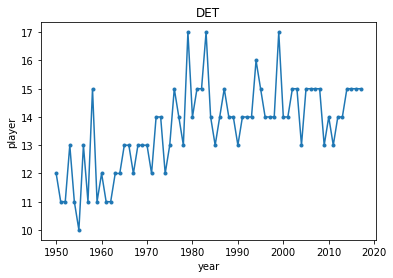

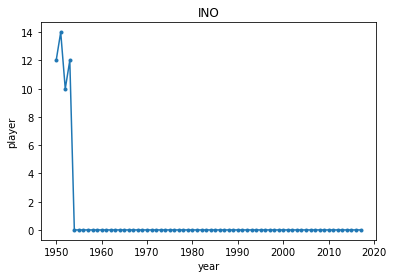

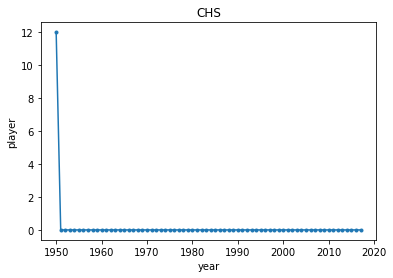

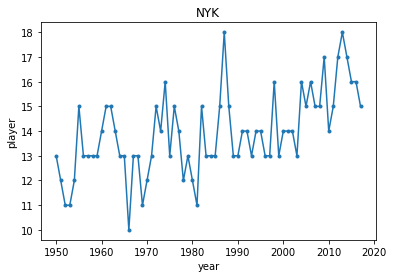

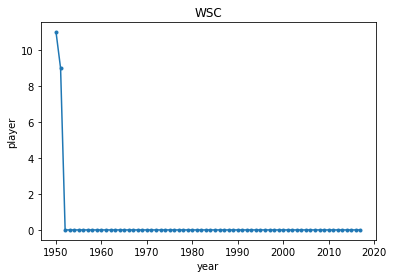

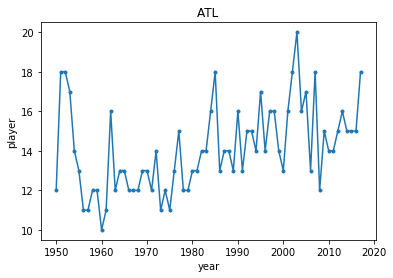

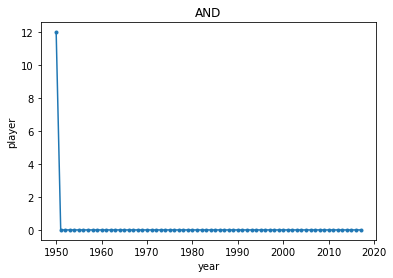

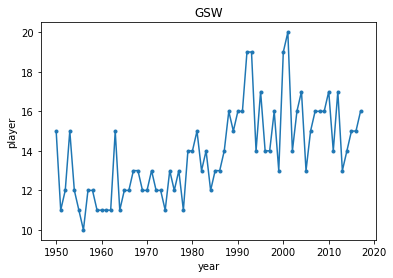

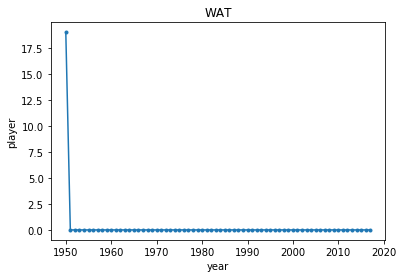

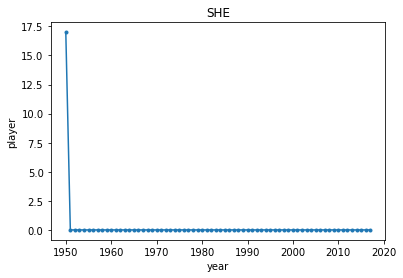

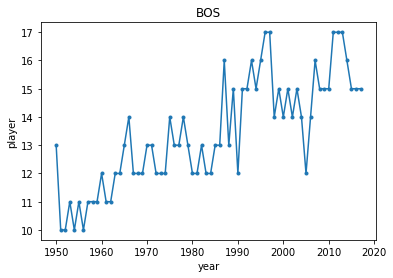

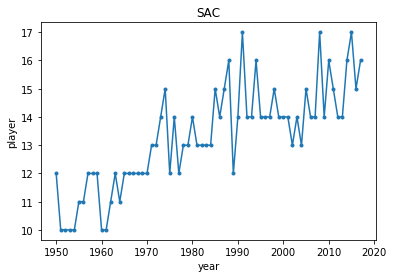

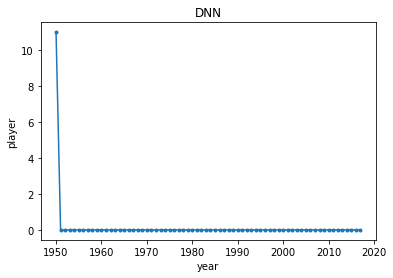

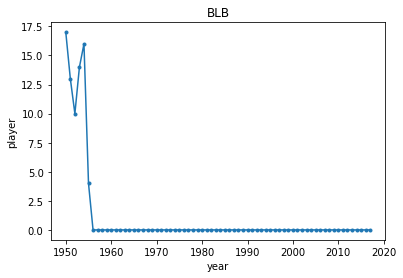

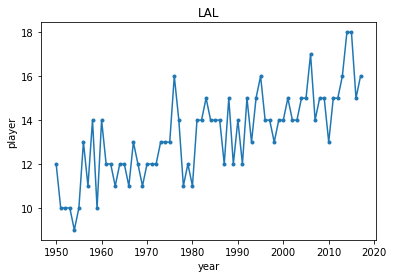

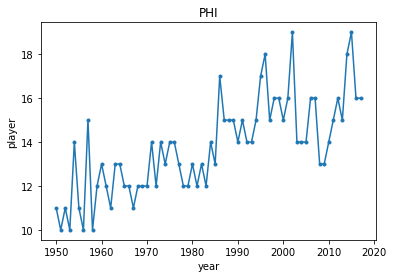

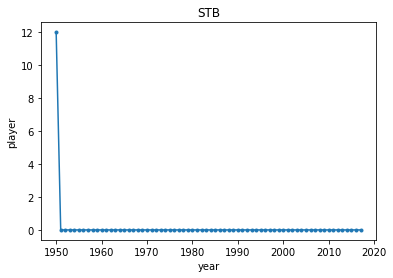

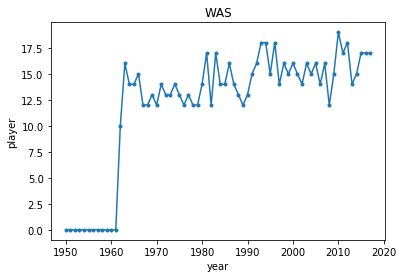

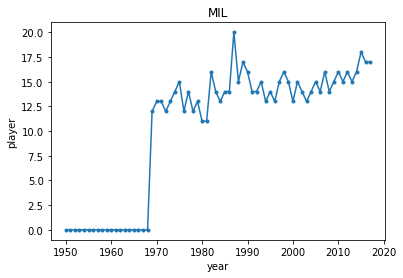

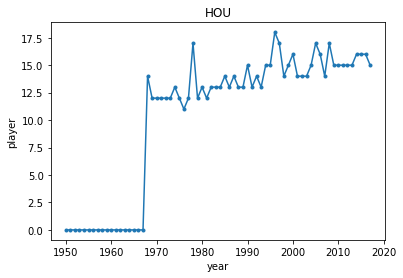

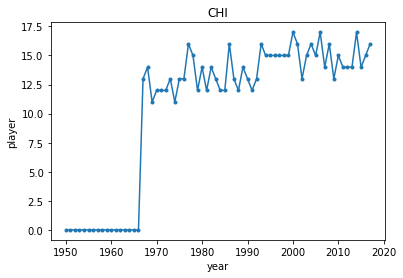

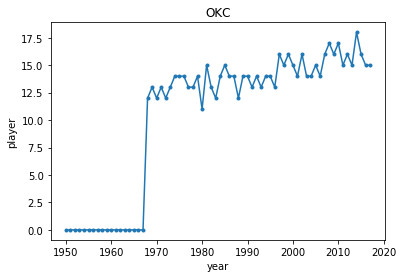

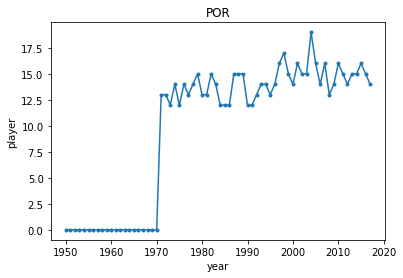

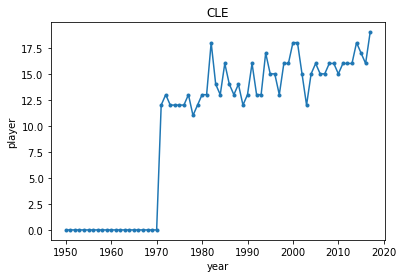

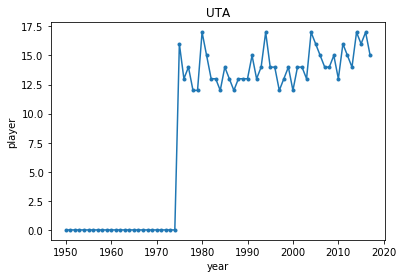

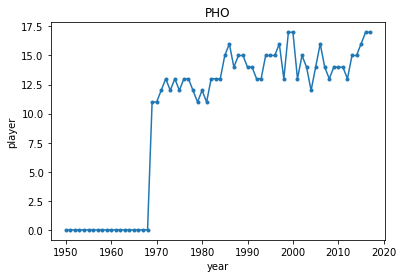

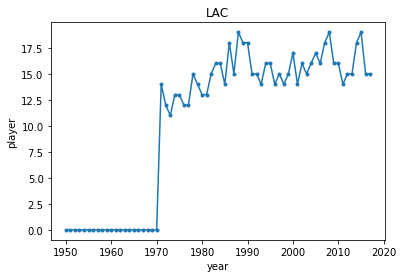

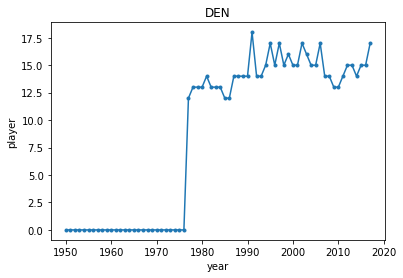

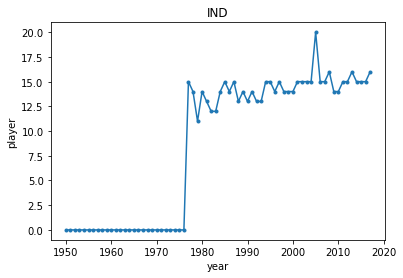

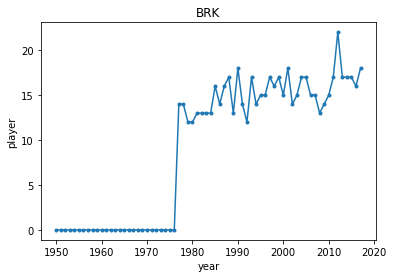

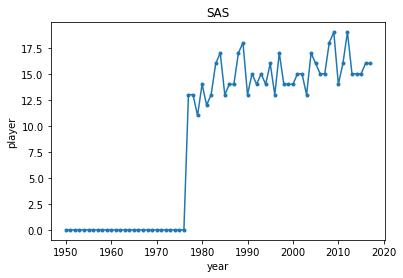

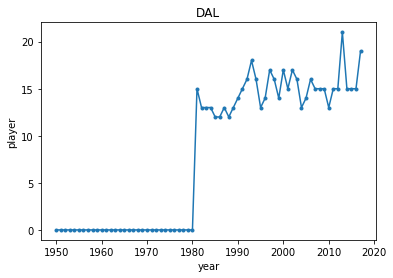

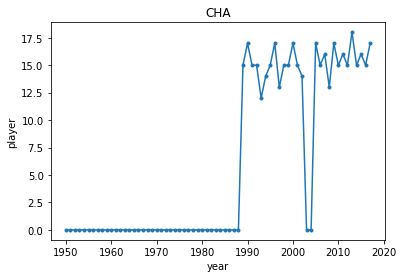

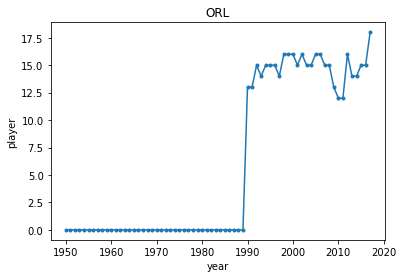

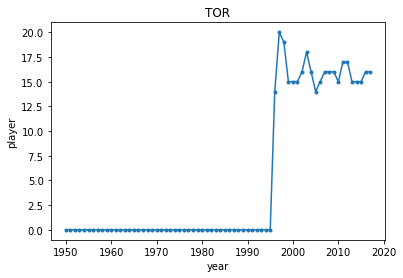

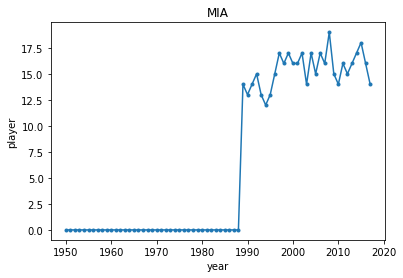

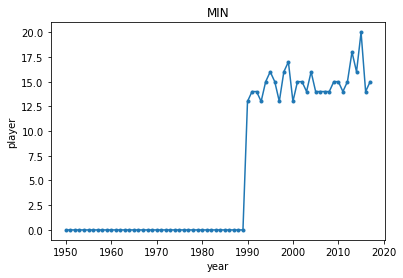

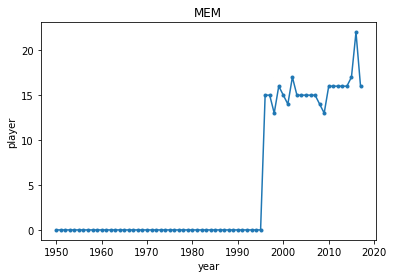

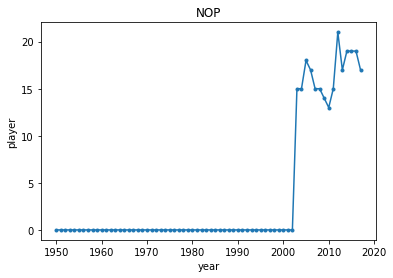

In [14]:
%pylab inline --no-import-all
def plot_history(history, team, save_name):

    plt.plot(history['year'], history['player'], marker=".")
    plt.title(team)
    plt.xlabel('year')
    plt.ylabel('player')
    plt.savefig(save_name)
    plt.show()

def get_history(tm, years):
    num_of_players = []
    for k, v in tm.items():
        num_of_players.append(v)
    history = {}
    history['year'] = years
    history['player'] = num_of_players
    return history

cnt = {}
for team in data['Tm'].unique():
    cnt[team] = {}

for year in years:
    df_per_year = data.query('Year == "' + str(year) + '"')
    for team in data['Tm'].unique():
        if team in df_per_year['Tm'].unique():
            cnt[team][year] = df_per_year.groupby(['Tm']).count()['Player'][team]
        else:
            cnt[team][year] = 0

for team in data['Tm'].unique():
    history = get_history(cnt[team], years)
    plot_history(history, team, "cnt_per_team/cnt_" + team + ".png")

In [15]:
data.to_csv(outputDir + "/EDA.csv")